# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [31]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import os
import csv
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [32]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [12]:

new_cities = []
cloudiness = []
country = []
date = []
humidity = []
temp = []
lat = []
lng = []
wind = []

In [13]:
record_counter = 0
set_counter = 0
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
print('------------------------')
print('Beginning Data Retrieval')
print('------------------------')

for city in cities:
    query_url = url + "&q=" + city
    # Get weather data
    response = requests.get(query_url).json()
    if record_counter < 50:
        record_counter += 1
    else:
        set_counter += 1
        record_counter = 0

    print('Processing record {} of set {} | {}'.format(record_counter, set_counter, city))
    print(url)
    try:
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        new_cities.append(city)
    except:
        print("City not found!")
        pass

print('-------------------------')
print('Data Retrieval Complete')
print('-------------------------')


------------------------
Beginning Data Retrieval
------------------------
Processing record 1 of set 0 | saint-joseph
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 2 of set 0 | kawalu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 3 of set 0 | nsanje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 4 of set 0 | kaitangata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 5 of set 0 | cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 6 of set 0 | tongliao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 7 of set 0 | hobart
http://api.openweathermap.org/data/2.5

Processing record 7 of set 1 | port hedland
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 8 of set 1 | kamenka
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 9 of set 1 | fort saint james
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 10 of set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 11 of set 1 | kruisfontein
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 12 of set 1 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 13 of set 1 | santa maria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a

Processing record 14 of set 2 | antofagasta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 15 of set 2 | chokurdakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 16 of set 2 | leningradskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 17 of set 2 | vardo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 18 of set 2 | saint-georges
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 19 of set 2 | pisco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 20 of set 2 | beloha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc

Processing record 21 of set 3 | bocanda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 22 of set 3 | manaus
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 23 of set 3 | egvekinot
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 24 of set 3 | namibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 25 of set 3 | mataura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 26 of set 3 | provideniya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 27 of set 3 | mlimba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing

Processing record 28 of set 4 | yellowknife
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 29 of set 4 | charters towers
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 30 of set 4 | victor harbor
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 31 of set 4 | la orilla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 32 of set 4 | dzilam gonzalez
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 33 of set 4 | kaoma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 34 of set 4 | laje
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a9

Processing record 36 of set 5 | farmington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 37 of set 5 | mount isa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 38 of set 5 | clyde river
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 39 of set 5 | rio grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 40 of set 5 | tumannyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
City not found!
Processing record 41 of set 5 | victoria
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 42 of set 5 | dicabisagan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9d

Processing record 42 of set 6 | pitsunda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 43 of set 6 | shelburne
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 44 of set 6 | baykalovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 45 of set 6 | cape canaveral
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 46 of set 6 | buritama
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 47 of set 6 | brae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 48 of set 6 | kazalinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
C

Processing record 48 of set 7 | aykhal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 49 of set 7 | meulaboh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 50 of set 7 | bubaque
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 0 of set 8 | taksimo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 1 of set 8 | vao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 2 of set 8 | el badari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
City not found!
Processing record 3 of set 8 | bokspits
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Ci

Processing record 3 of set 9 | itaqui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 4 of set 9 | makung
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
City not found!
Processing record 5 of set 9 | sinnar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 6 of set 9 | svetlogorsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 7 of set 9 | palmer
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 8 of set 9 | mabaruma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 9 of set 9 | fiche
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Proce

Processing record 10 of set 10 | abony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 11 of set 10 | teacapan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 12 of set 10 | balkhash
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 13 of set 10 | warrnambool
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 14 of set 10 | kudat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 15 of set 10 | guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 16 of set 10 | akyab
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc

Processing record 16 of set 11 | kadykchan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
City not found!
Processing record 17 of set 11 | sile
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 18 of set 11 | port hardy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 19 of set 11 | athabasca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 20 of set 11 | koson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 21 of set 11 | dakar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919da5e3bc
Processing record 22 of set 11 | amapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3c067844cb9dc3b8ddf14a919

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [33]:
# create a data frame from cities, temp, humidity, cloudiness and wind speed
weather_dict = {
    "City": new_cities,
    "Cloudiness" : cloudiness,
    "Country" : country,
    "Date" : date,
    "Humidity" : humidity,
    "Temp": temp,
    "Lat" : lat,
    "Lng" : lng,   
    "Wind Speed" : wind
}
weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Temp          544
Lat           544
Lng           544
Wind Speed    544
dtype: int64

In [34]:

weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Temp,Lat,Lng,Wind Speed
0,saint-joseph,0,FR,1570051098,82,70.00,43.56,6.97,3.36
1,kawalu,92,ID,1570051098,91,68.52,-7.38,108.21,2.62
2,nsanje,100,MZ,1570051099,82,68.28,-16.92,35.26,10.13
3,kaitangata,100,NZ,1570051099,64,48.00,-46.28,169.85,7.00
4,cape town,20,ZA,1570051067,87,61.00,-33.93,18.42,8.05


In [35]:

cities_list = zip(new_cities,cloudiness,country,date,humidity,temp,lat,lng)
# Set variable for output file
output_file = os.path.join('..', 'output_data', 'cities.csv')
#  Open the output file
with open(output_file, 'w') as datafile:
    weather_data.to_csv(output_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

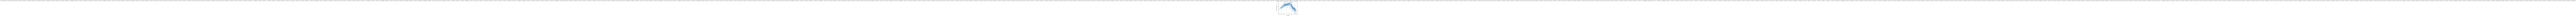

In [47]:
weather_data.plot(kind='scatter', x='Lat', y='Temp')
plt.title('City Latitude Vs Max Temperature ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Max temperature (F)')
plt.grid()
plt.savefig("../Images/LatitudeVsTemperature.png")


#### Latitude vs. Humidity Plot

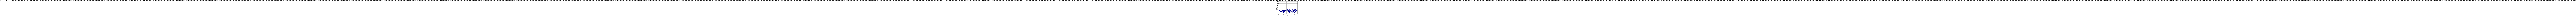

In [26]:
weather_data.plot(kind='scatter',x='Lat',y='Humidity', c='DarkBlue')
plt.title('City Latitude Vs Max Humidity ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig("../Images/LatitudeVsHumidity.png")

#### Latitude vs. Cloudiness Plot

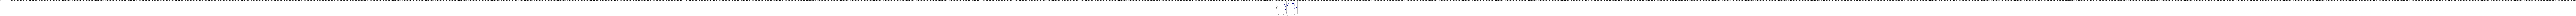

In [27]:
weather_data.plot(kind='scatter',x='Lat',y='Cloudiness', c='DarkBlue')
plt.title('City Latitude Vs Cloudiness ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("../Images/LatitudeVsCloudiness.png")

#### Latitude vs. Wind Speed Plot

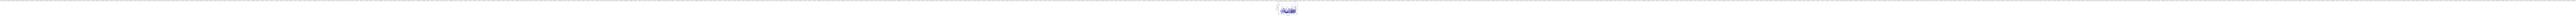

In [28]:
weather_data.plot(kind='scatter',x='Lat',y='Wind Speed', c='DarkBlue')
plt.title('City Latitude Vs Wind Speed ({})'.format(date) )
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.savefig("../Images/LatitudeVsWindSpeed.png")


In [ ]:
Analysis:
1. Weather becomes warmer as we approach the equater. From the plot, the northern hemispher seems to be slightly warmer. 
2. There is not much relationship between latitude and wind speed.
3. There is not much relationship between latitude and cloudiness.
4. There is not much relationship between latitude and humidity.